In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
import pandas_profiling
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from scipy.stats import chi2_contingency
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

In [5]:
df_original = pd.read_csv("bank-direct-marketing-campaigns.csv")

### Data describing

In [112]:
df_original.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [113]:
df_original.tail(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41179,64,retired,divorced,professional.course,no,yes,no,cellular,nov,fri,3,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41180,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [6]:
df_original.shape

(41188, 20)

In [130]:
df=df_original.drop_duplicates()
df.shape

(39404, 20)

### Hypothesis

Customer Behavior(Demographic) Level
     1.  Profession Type: Customers having a job of higher income are more likely to subscribe the term deposit because they have more revenue for deposit.
     2. Loan Status: Customers having a housing loan or personal loan are less likely to subscribe the term deposit because they need to a large amount of revenue to repay the loan.
     3. Marital Status: Customer who are married are more likely to subscribe the term deposit because they need deposit a part of their home revenue for future spending, such as kid’s education.
     4. Age Stage: Customer who are older are more likely to subscribe the term deposit because they need to prepare for their future life without income after retired.
Marketing Level
       1. Contact Frequency and Recency: Customers who are contacted more or recently by telemarketing are more likely to subscribe to the term deposit because the telemarketing will encourage them to get the feeling that it is better for them to have the term deposit.
       2. Contact Type: Customers who are contacted by cellphone are more likely to subscribe to the term deposit than telephone because nowadays more people use cellphone.
       3. Previous status: Customer who accepted the previous marketing campaign are more likely to subscribe the term deposit because they are more favor for the term deposit.
Social level
     1. Employment Rate: When the employment rate decreases the people are more likely to subscribe to the term deposit because they will more worry about unemployment.
      2. Consumer Price Index: When the consumer price index increases, people are less likely to subscribe to the term deposit because their spending will increase for inflation.

### Objectives

Are the marketing campaigns for the term deposit successful?

How can the banking institution have more effective direct marketing campaigns in the future?
 
Identify the patterns that will help the bank develop future strategies. 


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39404 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             39404 non-null  int64  
 1   job             39404 non-null  object 
 2   marital         39404 non-null  object 
 3   education       39404 non-null  object 
 4   default         39404 non-null  object 
 5   housing         39404 non-null  object 
 6   loan            39404 non-null  object 
 7   contact         39404 non-null  object 
 8   month           39404 non-null  object 
 9   day_of_week     39404 non-null  object 
 10  campaign        39404 non-null  int64  
 11  pdays           39404 non-null  int64  
 12  previous        39404 non-null  int64  
 13  poutcome        39404 non-null  object 
 14  emp.var.rate    39404 non-null  float64
 15  cons.price.idx  39404 non-null  float64
 16  cons.conf.idx   39404 non-null  float64
 17  euribor3m       39404 non-null 

In [8]:
df.nunique()

age                78
job                12
marital             4
education           8
default             3
housing             3
loan                3
contact             2
month              10
day_of_week         5
campaign           42
pdays              27
previous            8
poutcome            3
emp.var.rate       10
cons.price.idx     26
cons.conf.idx      26
euribor3m         316
nr.employed        11
y                   2
dtype: int64

In [118]:
#there are no missing values

In [269]:
df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,39404.000000,39404.000000,39404.000000,39404.000000,39404.000000,39404.000000,39404.000000,39404.000000,39404.000000
mean,40.116105,2.618744,960.847097,0.178738,0.064067,93.577538,-40.499604,3.601243,5165.986481
std,10.460328,2.814780,190.869184,0.503172,1.577041,0.583820,4.644327,1.742337,72.763866
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.798000,-41.800000,4.857000,5191.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [270]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

### Data Cleaning

In [11]:
df['emp.var.rate'].value_counts()

 1.4    15259
-1.8     8853
 1.1     7527
-0.1     3496
-2.9     1633
-3.4     1052
-1.7      770
-1.1      633
-3.0      171
-0.2       10
Name: emp.var.rate, dtype: int64

In [12]:
df['cons.price.idx'].value_counts()

93.994    7527
93.918    6210
92.893    5576
93.444    4732
94.465    4317
93.200    3429
93.075    2362
92.201     756
92.963     700
92.431     436
92.649     353
94.215     311
94.199     301
92.843     266
93.369     264
92.379     263
94.027     231
94.055     228
93.876     212
94.601     204
92.469     177
93.749     173
92.713     171
94.767     128
93.798      67
92.756      10
Name: cons.price.idx, dtype: int64

In [13]:
df['cons.conf.idx'].value_counts()

-36.4    7527
-42.7    6210
-46.2    5576
-36.1    4732
-41.8    4317
-42.0    3429
-47.1    2362
-31.4     756
-40.8     700
-26.9     436
-30.1     353
-40.3     311
-37.5     301
-50.0     266
-34.8     264
-29.8     263
-38.3     231
-39.8     228
-40.0     212
-49.5     204
-33.6     177
-34.6     173
-33.0     171
-50.8     128
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64

In [14]:
df['nr.employed'].value_counts()

5228.1    15259
5099.1     8204
5191.0     7527
5195.8     3496
5076.2     1633
5017.5     1052
4991.6      770
5008.7      649
4963.6      633
5023.5      171
5176.3       10
Name: nr.employed, dtype: int64

In [132]:
#filter categorical variables
categorical_columns = [x for x in df.dtypes.index if df.dtypes[x]=='object']
#Exclude ID cols and source:
categorical_columns =[x for x in categorical_columns]
#print frequency of categories
for col in categorical_columns:
    print("\nFrequency of Categories for variable %s" %col)
    print(df[col].value_counts())


Frequency of Categories for variable job
admin.           9873
blue-collar      8835
technician       6404
services         3801
management       2820
retired          1683
entrepreneur     1405
self-employed    1386
housemaid        1028
unemployed        992
student           852
unknown           325
Name: job, dtype: int64

Frequency of Categories for variable marital
married     23869
single      10997
divorced     4459
unknown        79
Name: marital, dtype: int64

Frequency of Categories for variable education
university.degree      11561
high.school             9121
basic.9y                5785
professional.course     5018
basic.4y                3993
basic.6y                2222
unknown                 1686
illiterate                18
Name: education, dtype: int64

Frequency of Categories for variable default
no         31135
unknown     8266
yes            3
Name: default, dtype: int64

Frequency of Categories for variable housing
yes        20561
no         17863
unknown  

In [133]:
df['job'][df["job"]=='admin.']='admin'
df['job'][df["job"]=='blue-collar']='blue_collar'
df['job'][df["job"]=='self-employed']='self_employed'

In [273]:
df['job'].value_counts()

admin            9873
blue_collar      8835
technician       6404
services         3801
management       2820
retired          1683
entrepreneur     1405
self_employed    1386
housemaid        1028
unemployed        992
student           852
unknown           325
Name: job, dtype: int64

In [274]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [134]:
df['education'][df["education"]=='university.degree']='university_degree'
df['education'][df["education"]=='high.school']='high_school'
df['education'][df["education"]=='basic.9y']='basic_9y'
df['education'][df["education"]=='professional.course']='professional_course'
df['education'][df["education"]=='basic.4y']='basic_4y'
df['education'][df["education"]=='basic.6y']='basic_6y'

In [276]:
df['education'].value_counts()

university_degree      11561
high_school             9121
basic_9y                5785
professional_course     5018
basic_4y                3993
basic_6y                2222
unknown                 1686
illiterate                18
Name: education, dtype: int64

In [135]:
df=df.rename(columns={'emp.var.rate': 'emp_var_rate', 'cons.price.idx': 'cons_price_idx','cons.conf.idx':'cons_conf_idx',
                     'nr.employed':'nr_employed','y':'subscribe_term_deposit'})

In [18]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx',
       'euribor3m', 'nr_employed', 'subscribe_term_deposit'],
      dtype='object')

In [279]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscribe_term_deposit
0,56,housemaid,married,basic_4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high_school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high_school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin,married,basic_6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high_school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic_9y,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin,married,professional_course,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue_collar,married,unknown,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional_course,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high_school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### EDA

univariate analysis

In [133]:
#Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
      # 'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       #'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx',
      # 'euribor3m', 'nr_employed', 'subscribe_term_deposit'],
      #dtype='object')

<AxesSubplot:xlabel='age'>

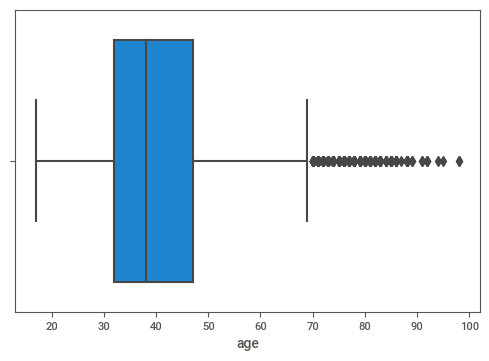

In [22]:
sns.boxplot(df.age)

<AxesSubplot:>

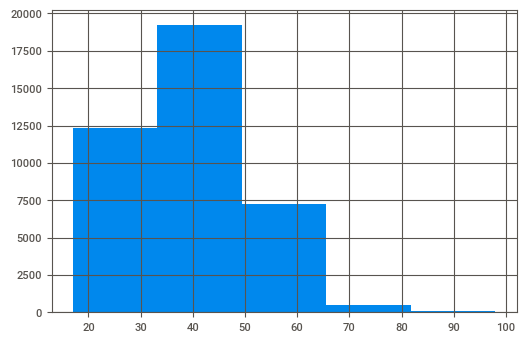

In [281]:
df['age'].hist(bins=5)

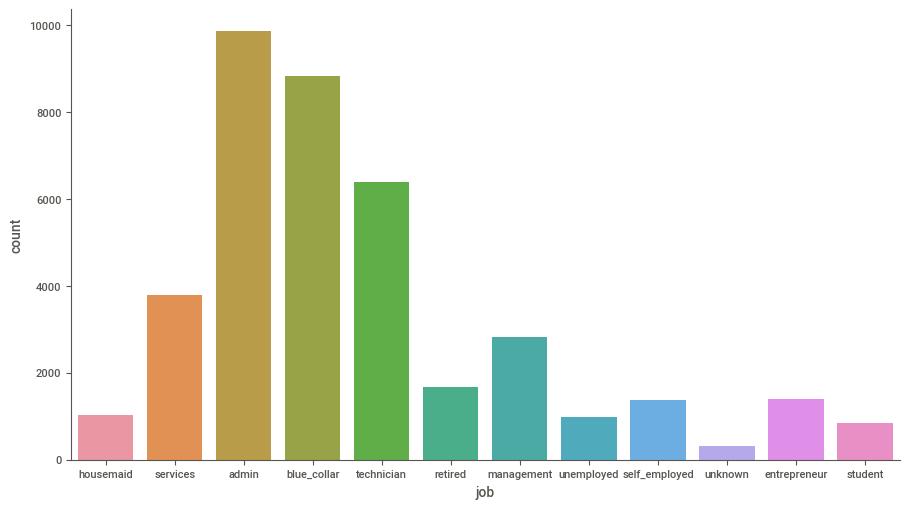

In [282]:
sns.catplot(x='job',data=df,kind='count',orient='v',aspect=1.8)

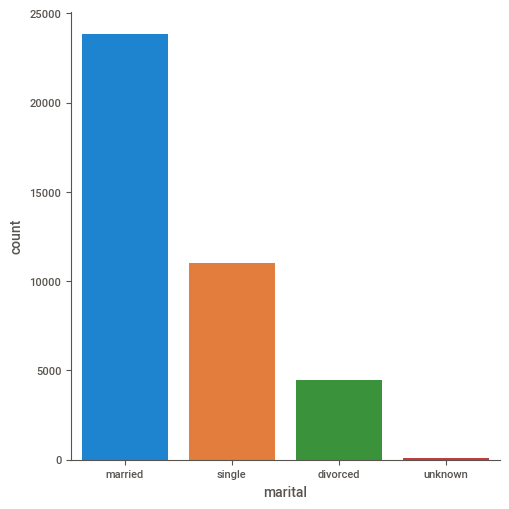

In [283]:
sns.catplot(x='marital',data=df,kind='count',height=5)

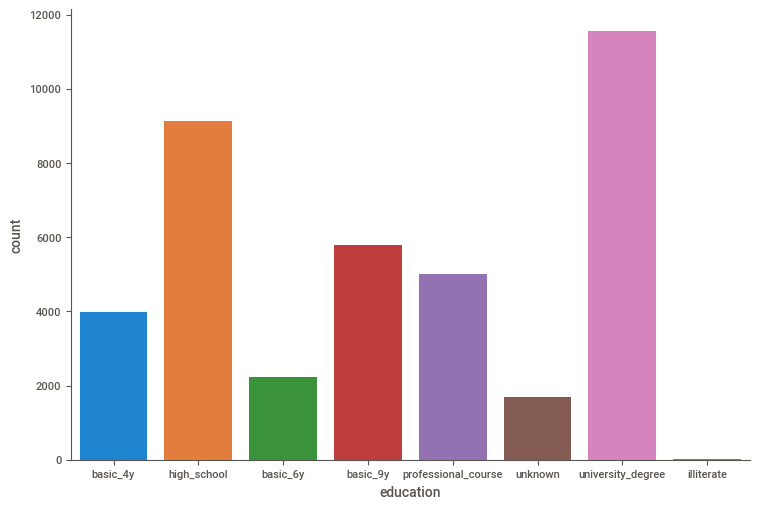

In [284]:
sns.catplot(x='education',data=df, kind='count',aspect=1.5,height=5)

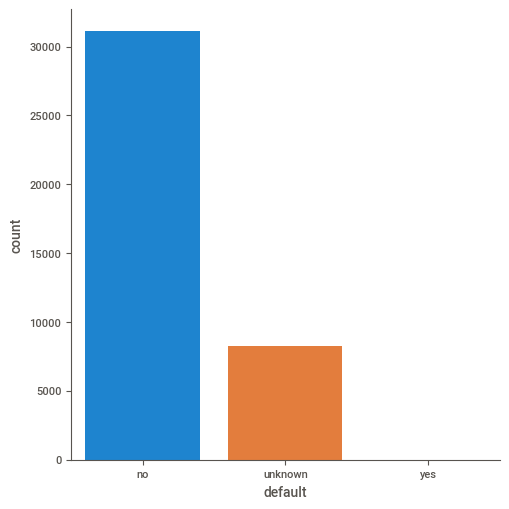

In [285]:
sns.catplot(x='default',data=df,kind='count')

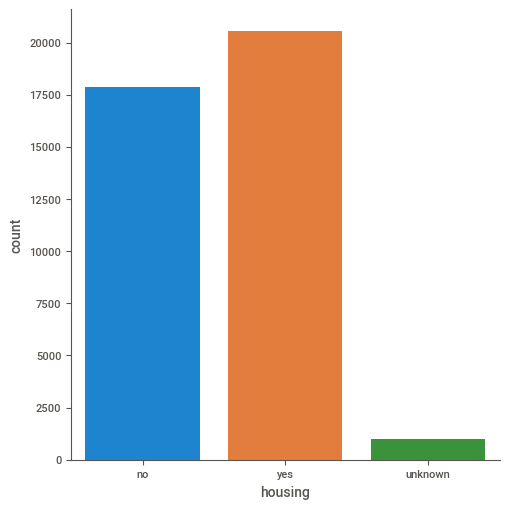

In [286]:
sns.catplot(x='housing',data=df,kind='count')

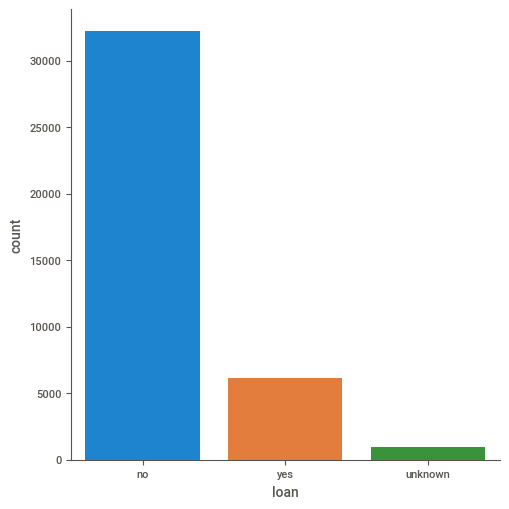

In [287]:
sns.catplot(x='loan',data=df,kind='count')

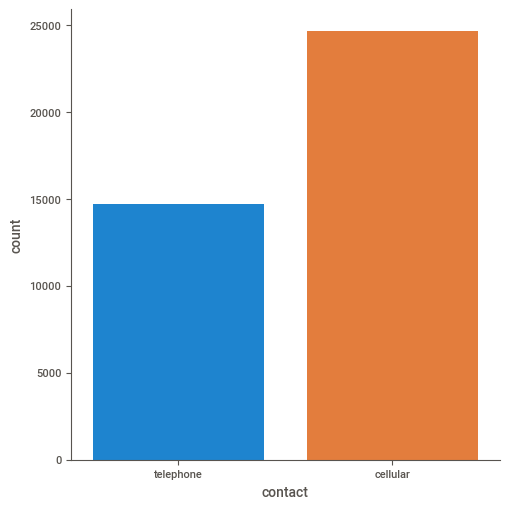

In [288]:
sns.catplot(x='contact',data=df,kind='count')

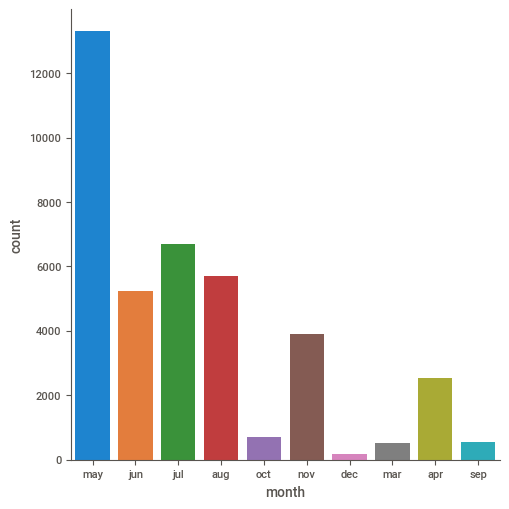

In [289]:
sns.catplot(x='month',data=df,kind='count')

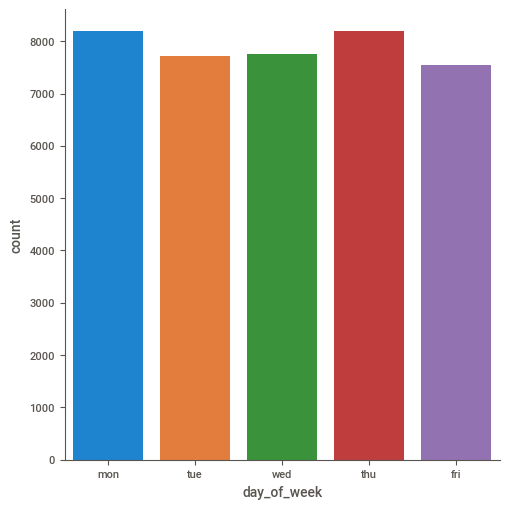

In [290]:
sns.catplot(x='day_of_week',data=df,kind='count')

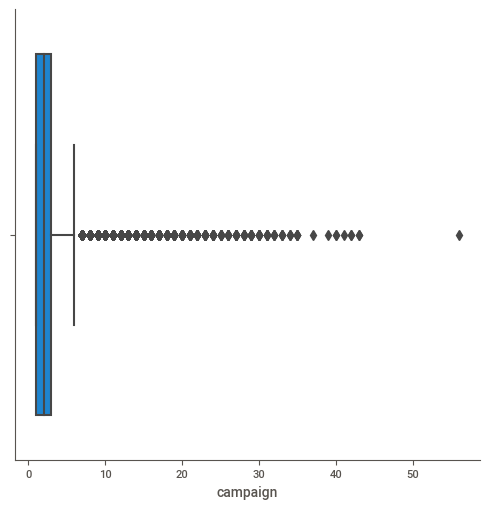

In [291]:
sns.catplot(x='campaign',data=df,kind='box')

<AxesSubplot:>

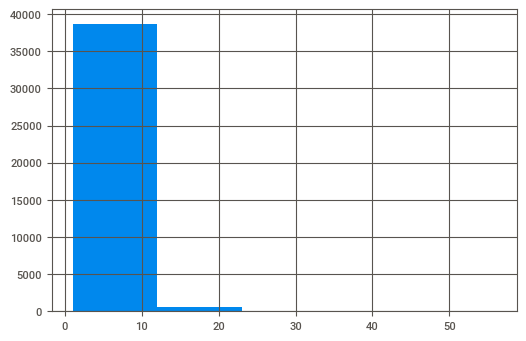

In [292]:
df['campaign'].hist(bins=5)

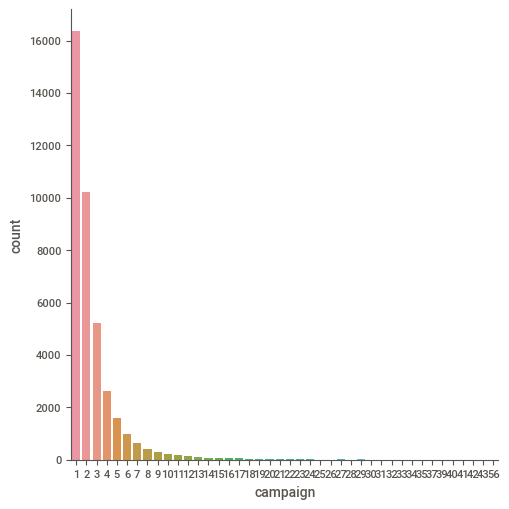

In [293]:
sns.catplot(x='campaign',data=df,kind='count')#need to bin

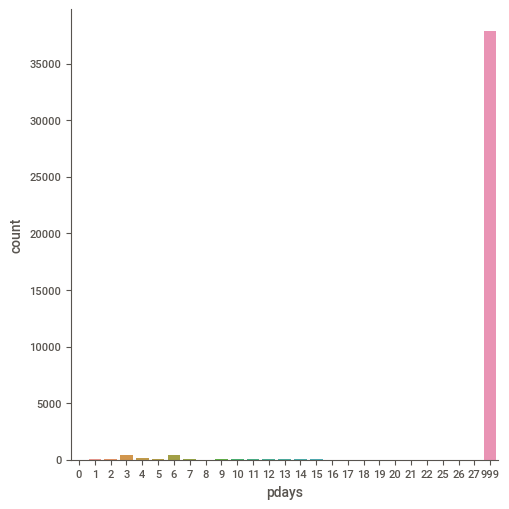

In [294]:
sns.catplot(x='pdays',data=df,kind='count')#changed to boolean

<AxesSubplot:>

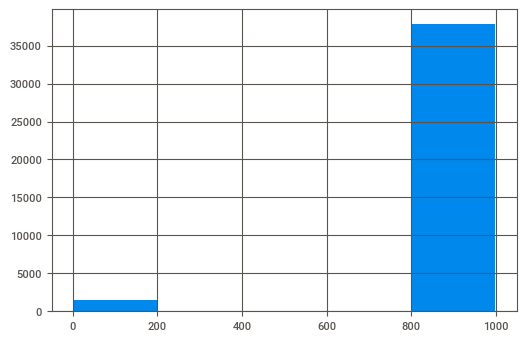

In [295]:
df['pdays'].hist(bins=5)

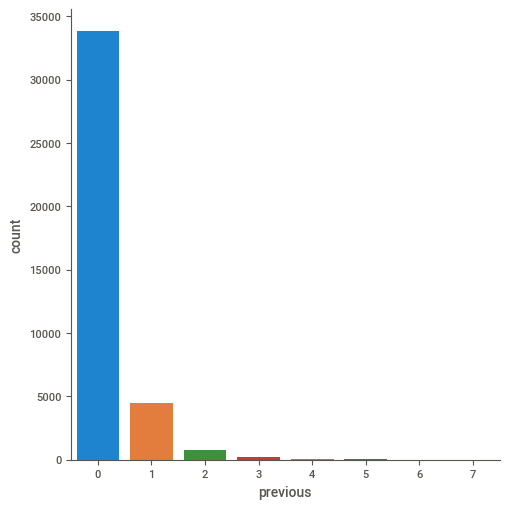

In [296]:
sns.catplot(x='previous',data=df,kind='count')#changed to boolean or 3 levels

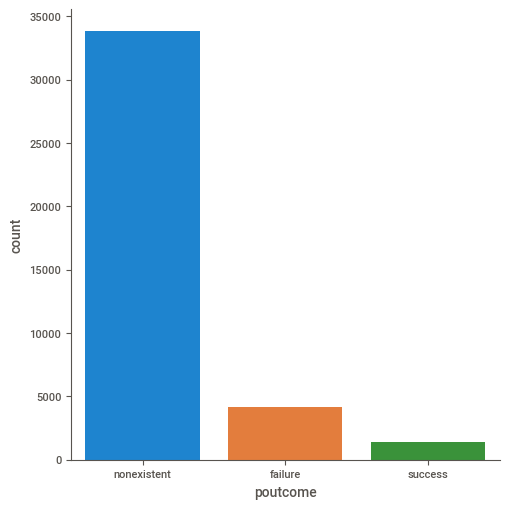

In [297]:
sns.catplot(x='poutcome',data=df,kind='count')

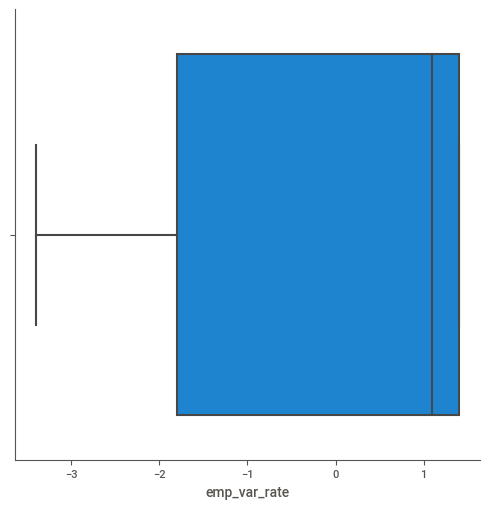

In [298]:
sns.catplot(x='emp_var_rate',data=df,kind='box')

<AxesSubplot:>

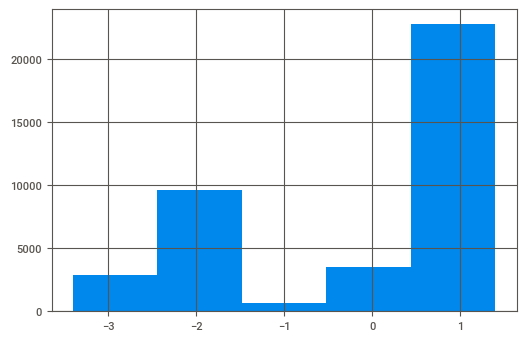

In [299]:
df['emp_var_rate'].hist(bins=5)

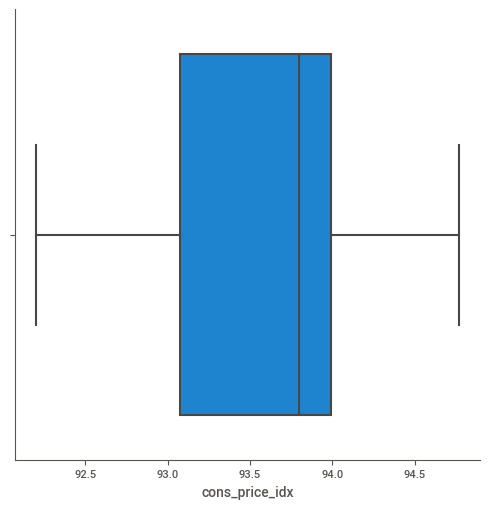

In [300]:
sns.catplot(x='cons_price_idx',data=df,kind='box')

<AxesSubplot:>

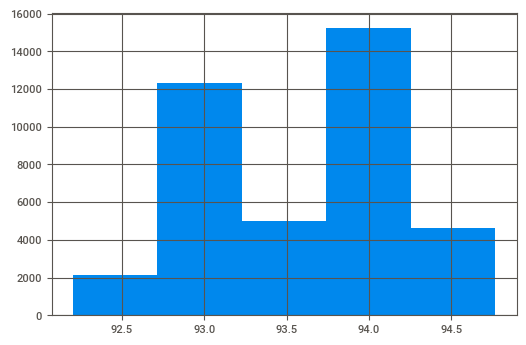

In [301]:
df['cons_price_idx'].hist(bins=5)

<AxesSubplot:xlabel='cons_price_idx', ylabel='Count'>

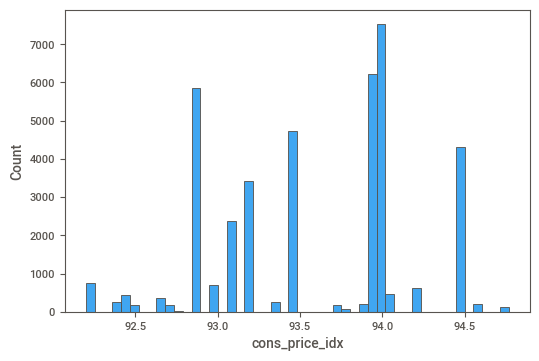

In [302]:
sns.histplot(x='cons_price_idx',data=df)

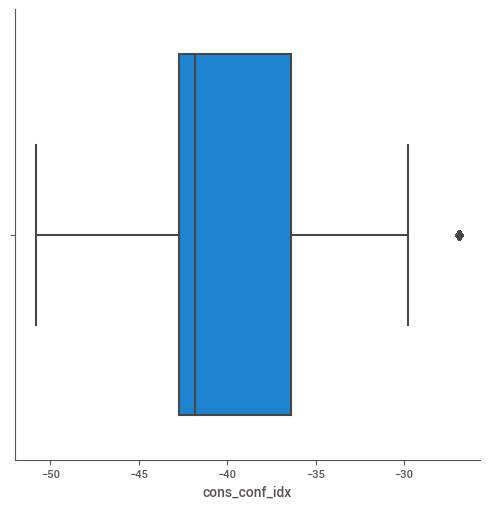

In [303]:
sns.catplot(x='cons_conf_idx',data=df,kind='box')

<AxesSubplot:>

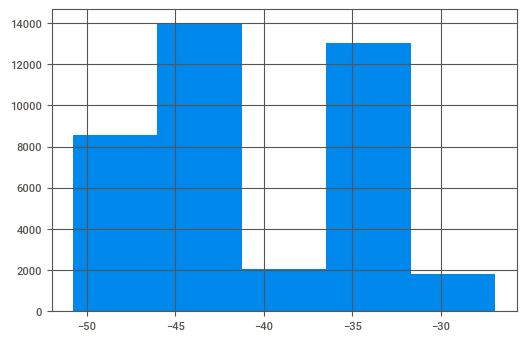

In [304]:
df['cons_conf_idx'].hist(bins=5)

<AxesSubplot:xlabel='cons_conf_idx', ylabel='Count'>

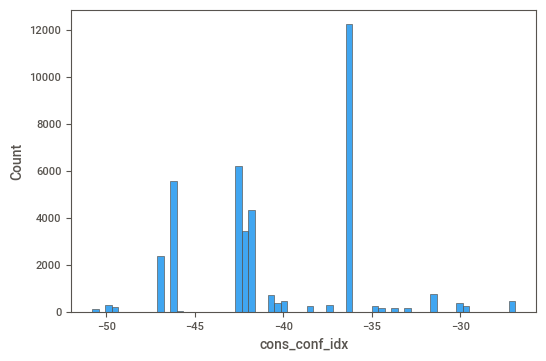

In [305]:
sns.histplot(x='cons_conf_idx',data=df)

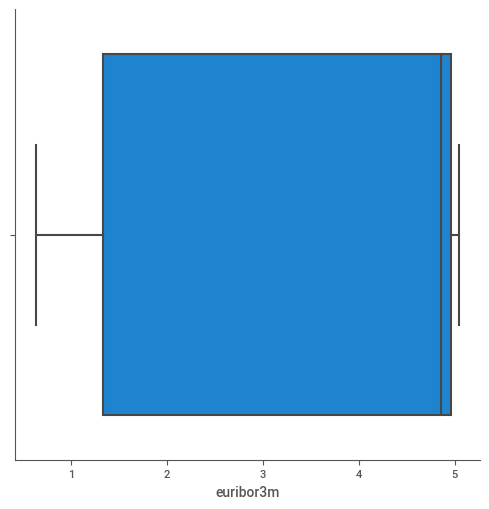

In [306]:
sns.catplot(x='euribor3m',data=df,kind='box')

<AxesSubplot:xlabel='euribor3m', ylabel='Count'>

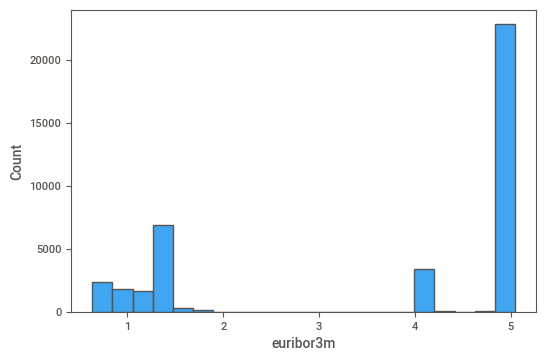

In [307]:
sns.histplot(x='euribor3m',data=df)

<AxesSubplot:>

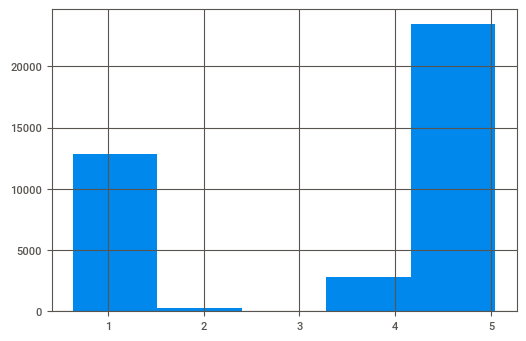

In [308]:
df['euribor3m'].hist(bins=5)

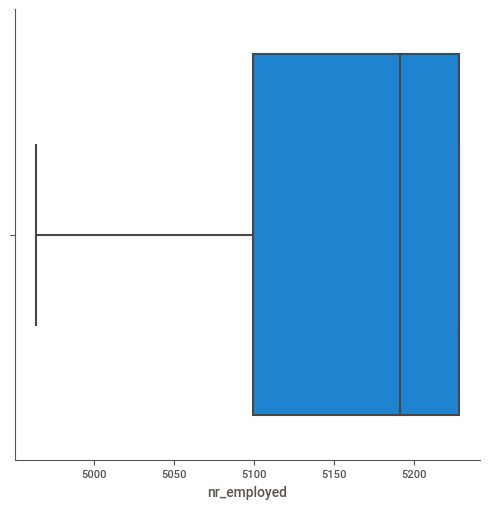

In [309]:
sns.catplot(x='nr_employed',data=df,kind='box')

<AxesSubplot:xlabel='nr_employed', ylabel='Count'>

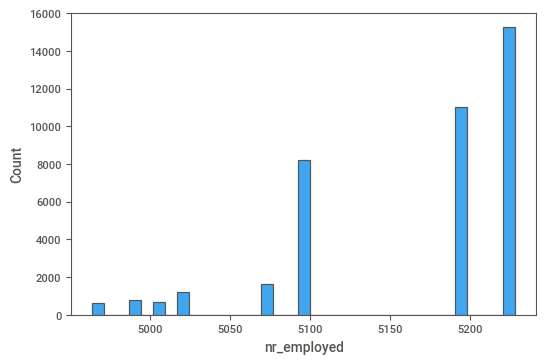

In [310]:
sns.histplot(x='nr_employed',data=df)

<AxesSubplot:>

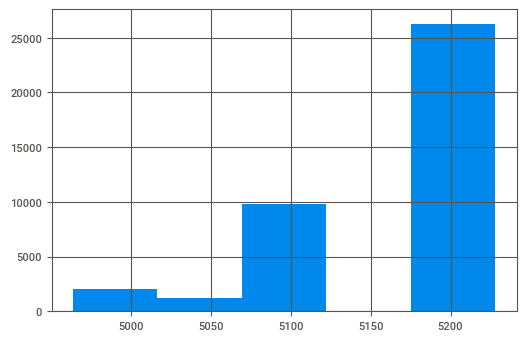

In [311]:
df['nr_employed'].hist(bins=5)

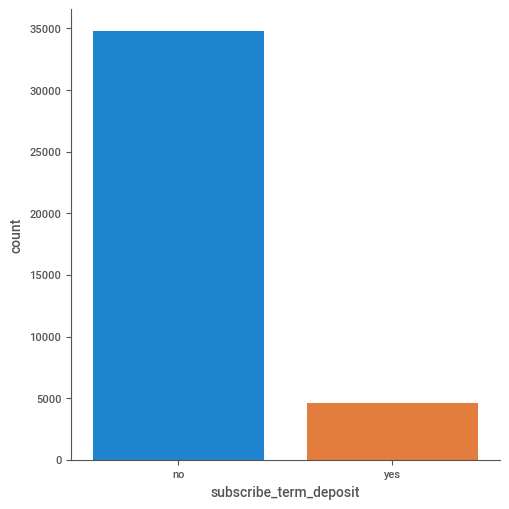

In [312]:
sns.catplot(x='subscribe_term_deposit',data=df,kind='count')#imbalance 

bivariate analysis

subscribe_term_deposit vs age

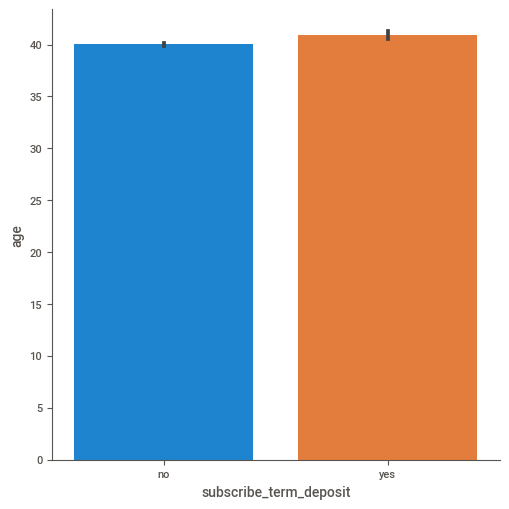

In [313]:
sns.catplot(x='subscribe_term_deposit',y='age',data=df,kind='bar')

subscribe_term_deposit vs marital

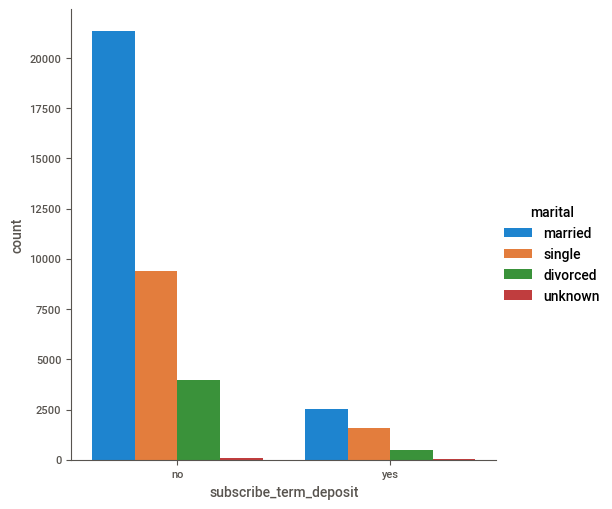

In [314]:
sns.catplot(x='subscribe_term_deposit',hue='marital',data=df,kind='count')

In [315]:
stat, p, dof, expected = chi2_contingency(pd.crosstab(df['marital'],
                                                      df['subscribe_term_deposit']))

In [316]:
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Has a relationship (reject H0)')
else:
    print('Has no relationship(H0 holds true)')

p value is 1.8235801176892437e-26
Has a relationship (reject H0)


subscribe_term_deposit vs job

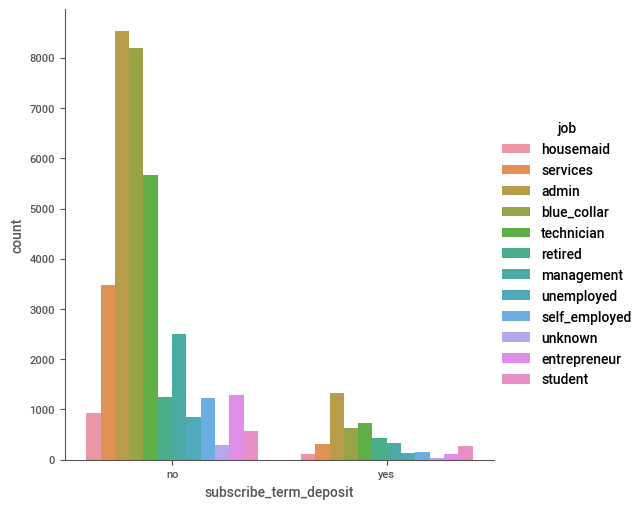

In [317]:
sns.catplot(x='subscribe_term_deposit',hue='job',data=df,kind='count')

Chi-square Test

In [318]:
stat, p, dof, expected = chi2_contingency(pd.crosstab(df['job'],
                                                      df['subscribe_term_deposit']))

In [319]:
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Has a relationship (reject H0)')
else:
    print('Has no relationship(H0 holds true)')

p value is 3.536610760628889e-190
Has a relationship (reject H0)


subscribe_term_deposit vs education

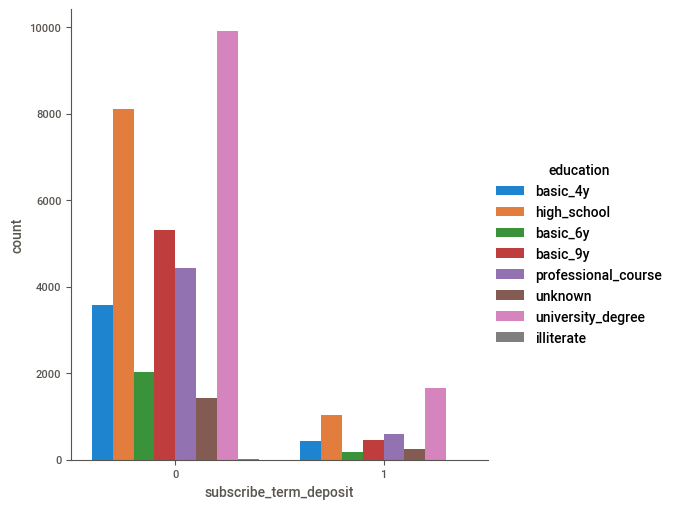

In [197]:
sns.catplot(x='subscribe_term_deposit',hue='education',data=df,kind='count')

In [198]:
stat, p, dof, expected = chi2_contingency(pd.crosstab(df['education'],
                                                      df['subscribe_term_deposit']))

In [199]:
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Has a relationship (reject H0)')
else:
    print('Has no relationship(H0 holds true)')

p value is 9.694666797444143e-39
Has a relationship (reject H0)


subscribe_term_deposit vs default

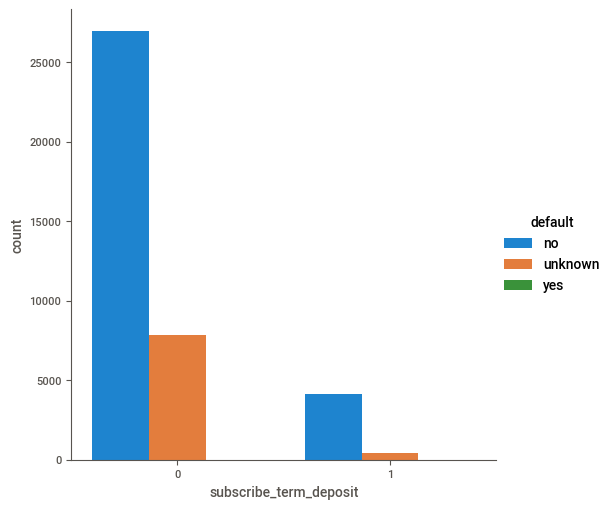

In [200]:
sns.catplot(x='subscribe_term_deposit',hue='default',data=df,kind='count')

In [201]:
stat, p, dof, expected = chi2_contingency(pd.crosstab(df['default'],
                                                      df['subscribe_term_deposit']))

In [202]:
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Has a relationship (reject H0)')
else:
    print('Has no relationship(H0 holds true)')

p value is 6.594463032134479e-89
Has a relationship (reject H0)


subscribe_term_deposit vs housing

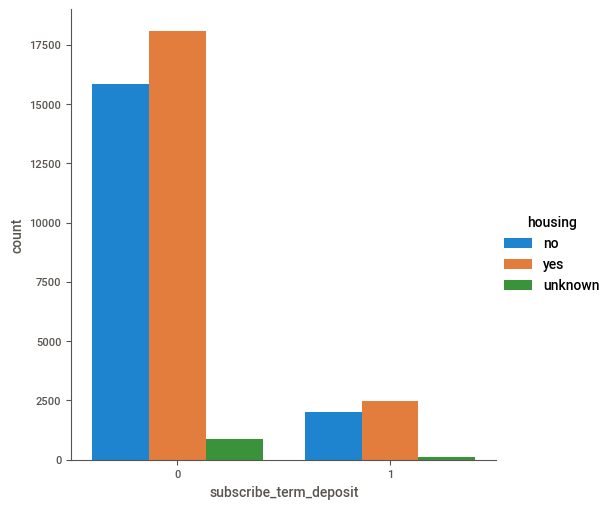

In [203]:
sns.catplot(x='subscribe_term_deposit',hue='housing',data=df,kind='count')

In [178]:
stat, p, dof, expected = chi2_contingency(pd.crosstab(df['housing'],
                                                      df['subscribe_term_deposit']))

In [179]:
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Has a relationship (reject H0)')
else:
    print('Has no relationship(H0 holds true)')

p value is 0.04106125108854696
Has a relationship (reject H0)


subscribe_term_deposit vs loan

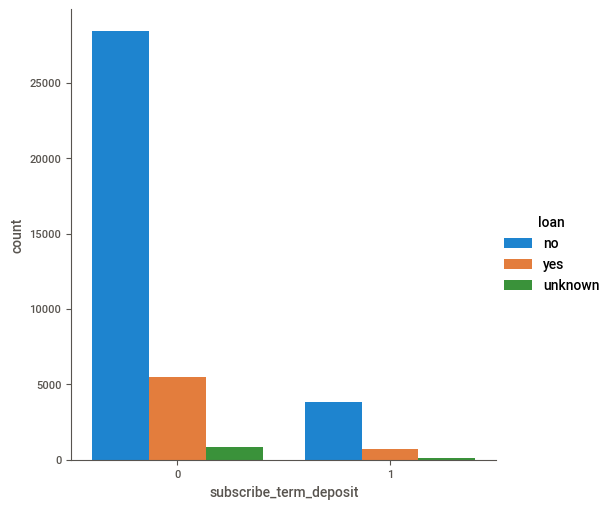

In [206]:
sns.catplot(x='subscribe_term_deposit',hue='loan',data=df,kind='count')

In [176]:
stat, p, dof, expected = chi2_contingency(pd.crosstab(df['loan'],
                                                      df['subscribe_term_deposit']))

In [177]:
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Has a relationship (reject H0)')
else:
    print('Has no relationship(H0 holds true)')

p value is 0.1718913969742047
Has no relationship(H0 holds true)


subscribe_term_deposit vs contact

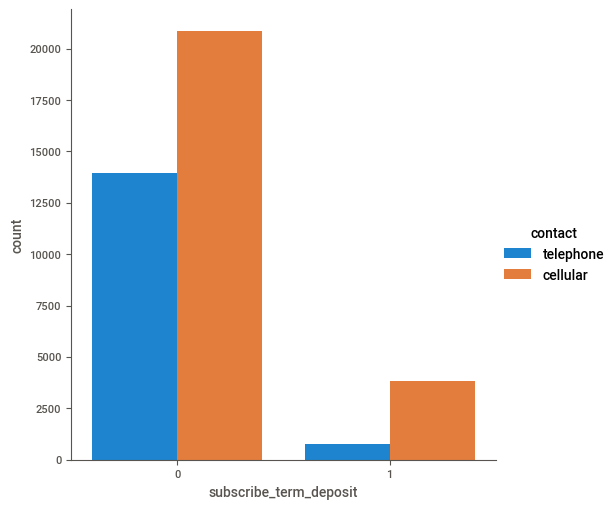

In [208]:
sns.catplot(x='subscribe_term_deposit',hue='contact',data=df,kind='count')

In [209]:
stat, p, dof, expected = chi2_contingency(pd.crosstab(df['contact'],
                                                      df['subscribe_term_deposit']))

In [210]:
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Has a relationship (reject H0)')
else:
    print('Has no relationship(H0 holds true)')

p value is 1.840004330235707e-200
Has a relationship (reject H0)


subscribe_term_deposit vs month

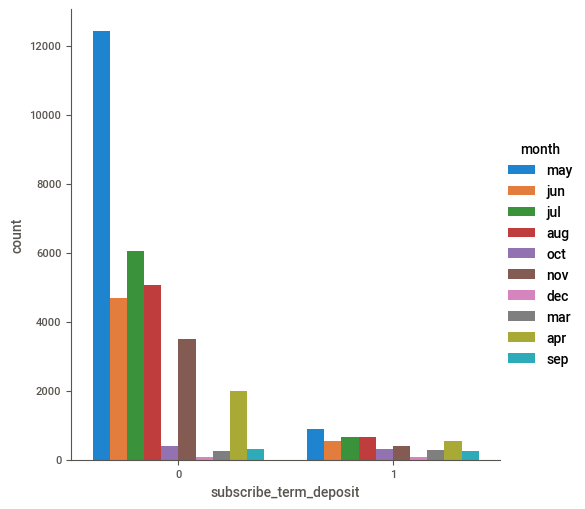

In [211]:
sns.catplot(x='subscribe_term_deposit',hue='month',data=df,kind='count')

In [212]:
stat, p, dof, expected = chi2_contingency(pd.crosstab(df['month'],
                                                      df['subscribe_term_deposit']))

In [213]:
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Has a relationship (reject H0)')
else:
    print('Has no relationship(H0 holds true)')

p value is 0.0
Has a relationship (reject H0)


subscribe_term_deposit vs subscribe_term_deposit

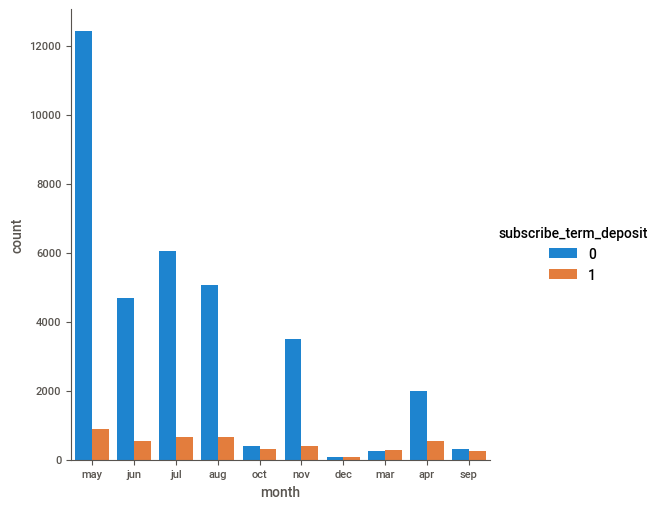

In [214]:
sns.catplot(x='month',hue='subscribe_term_deposit',data=df,kind='count')

subscribe_term_deposit vs day_of_week

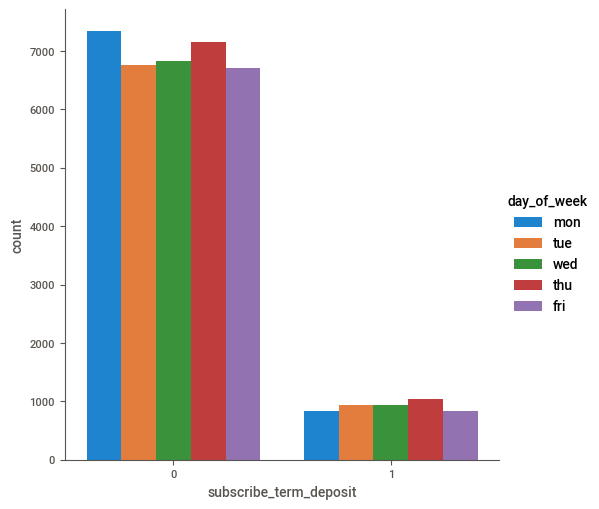

In [215]:
sns.catplot(x='subscribe_term_deposit',hue='day_of_week',data=df,kind='count')

In [216]:
stat, p, dof, expected = chi2_contingency(pd.crosstab(df['day_of_week'],
                                                      df['subscribe_term_deposit']))

In [217]:
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Has a relationship (reject H0)')
else:
    print('Has no relationship(H0 holds true)')

p value is 8.907745763044138e-06
Has a relationship (reject H0)


subscribe_term_deposit vs campaign

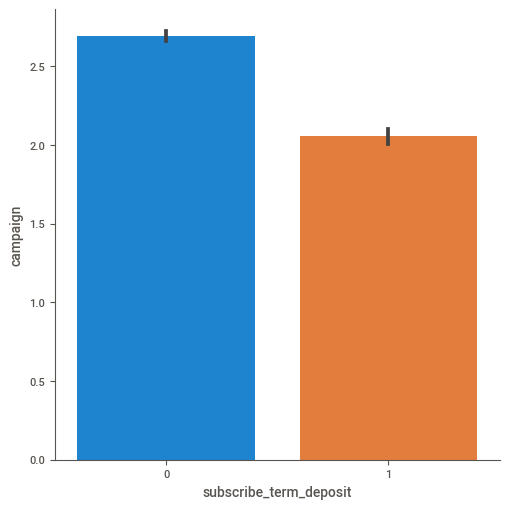

In [218]:
sns.catplot(x='subscribe_term_deposit',y='campaign',data=df,kind='bar')
#number of contacts performed during this campaign and for this client (numeric, includes last contact) 

subscribe_term_deposit vs pdays

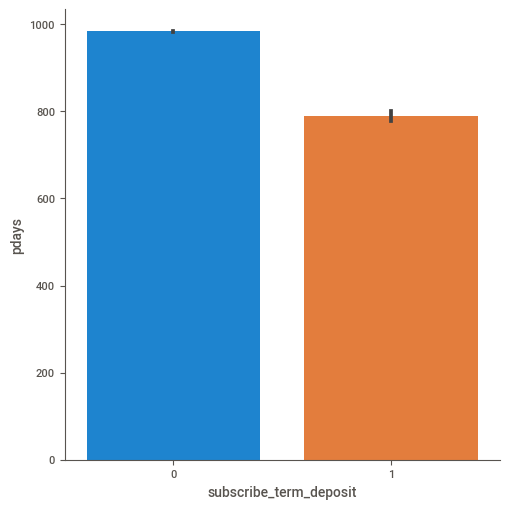

In [219]:
sns.catplot(x='subscribe_term_deposit',y='pdays',data=df,kind='bar')
#number of days that passed by after the client was last contacted from a previous campaign 
#(numeric; 999 means client was not previously contacted) 

subscribe_term_deposit vs previous

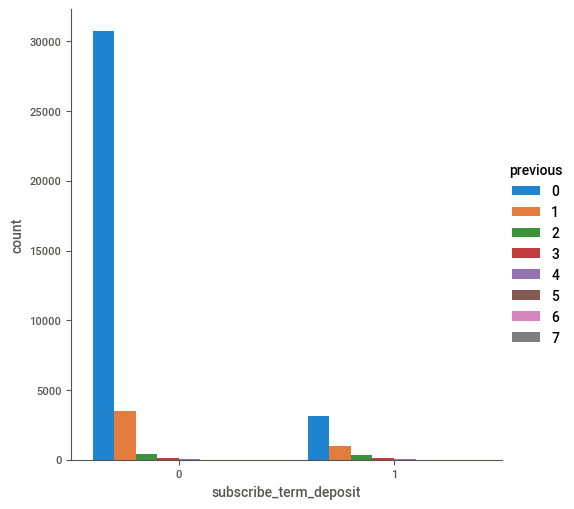

In [220]:
sns.catplot(x='subscribe_term_deposit',hue='previous',data=df,kind='count')
#number of contacts performed before this campaign and for this client 

In [221]:
stat, p, dof, expected = chi2_contingency(pd.crosstab(df['previous'],
                                                      df['subscribe_term_deposit']))

In [222]:
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Has a relationship (reject H0)')
else:
    print('Has no relationship(H0 holds true)')

p value is 0.0
Has a relationship (reject H0)


subscribe_term_deposit vs poutcome

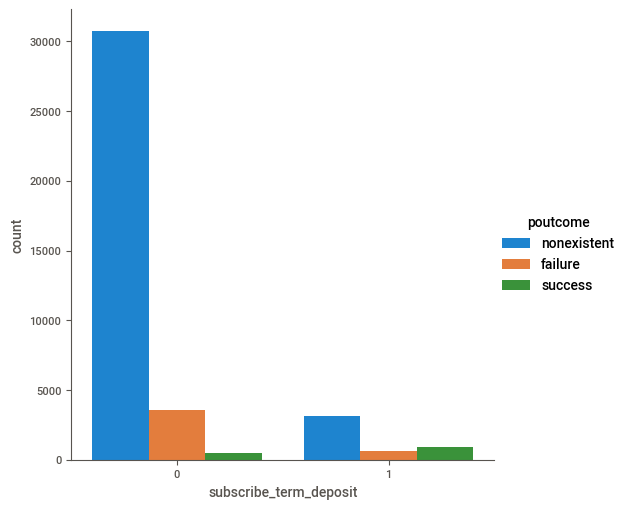

In [223]:
sns.catplot(x='subscribe_term_deposit',hue='poutcome',data=df,kind='count')
#outcome of the previous marketing campaign 

In [224]:
stat, p, dof, expected = chi2_contingency(pd.crosstab(df['poutcome'],
                                                      df['subscribe_term_deposit']))

In [225]:
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Has a relationship (reject H0)')
else:
    print('Has no relationship(H0 holds true)')

p value is 0.0
Has a relationship (reject H0)


subscribe_term_deposit vs emp_var_rate

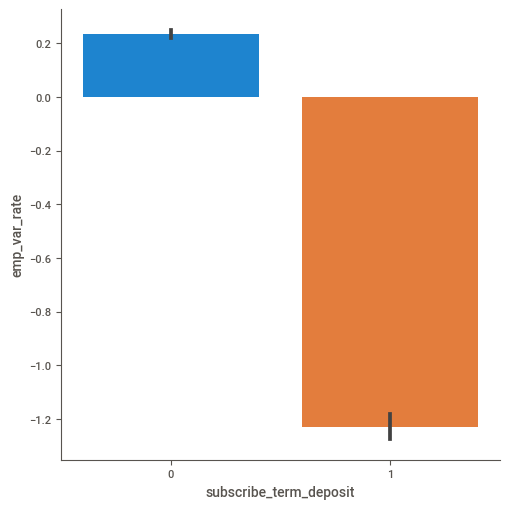

In [226]:
sns.catplot(x='subscribe_term_deposit',y='emp_var_rate',data=df,kind='bar')

In [ ]:
#Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
      # 'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       #'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx',
      # 'euribor3m', 'nr_employed', 'subscribe_term_deposit'],
      #dtype='object')

subscribe_term_deposit vs cons_price_idx

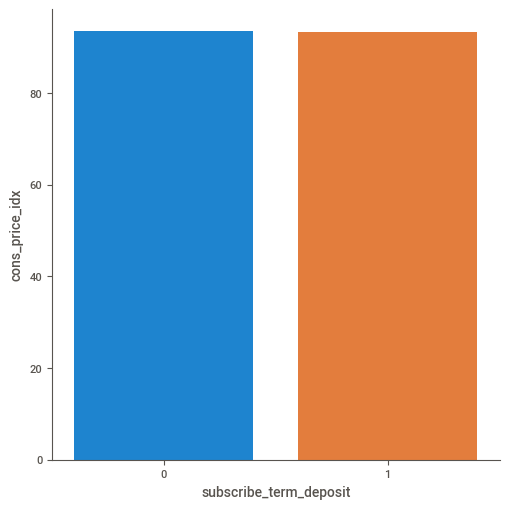

In [227]:
sns.catplot(x='subscribe_term_deposit',y='cons_price_idx',data=df,kind='bar')

subscribe_term_deposit vs cons_conf_idx

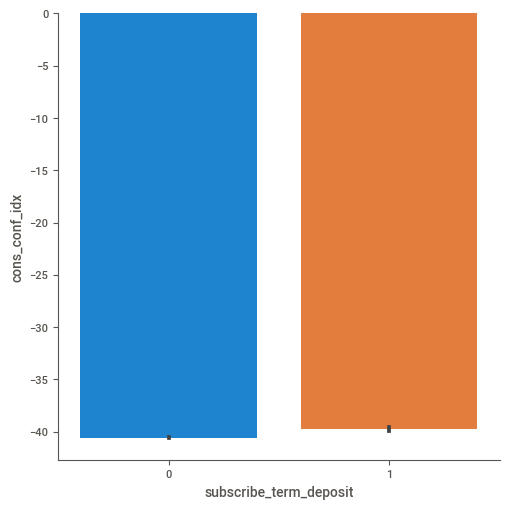

In [228]:
sns.catplot(x='subscribe_term_deposit',y='cons_conf_idx',data=df,kind='bar')

subscribe_term_deposit vs euribor3m

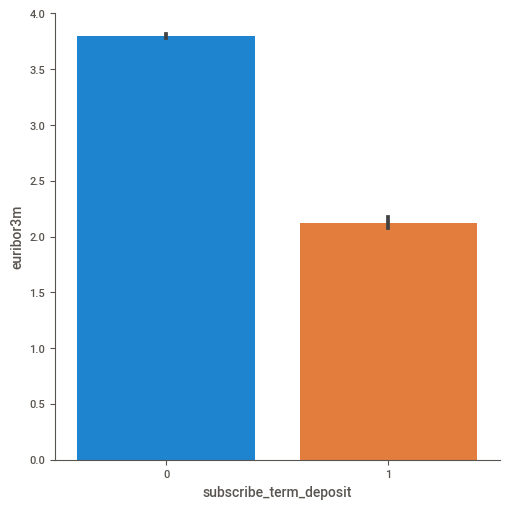

In [229]:
sns.catplot(x='subscribe_term_deposit',y='euribor3m',data=df,kind='bar')

subscribe_term_deposit vs nr_employed

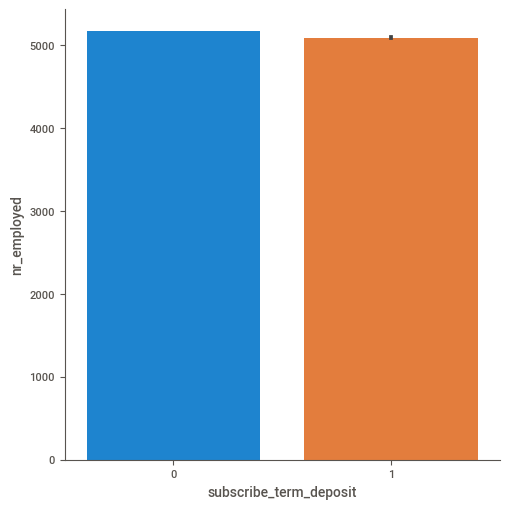

In [230]:
sns.catplot(x='subscribe_term_deposit',y='nr_employed',data=df,kind='bar')

Feature Engineering

In [231]:
df.previous.value_counts()

0    33858
1     4484
2      752
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [136]:
#group the "previous" column
df['previous_group']=0
df.shape

(39404, 21)

In [152]:
df["previous_group"]=0
df.previous_group

0        0
1        0
2        0
3        0
4        0
        ..
41183    0
41184    0
41185    0
41186    0
41187    1
Name: previous_group, Length: 39404, dtype: int64

In [154]:
df['previous_group'][df['previous']>1]= '2+'
df['previous_group'][df['previous']==1]= '1'
df['previous_group'][df['previous']==0]= '0'
df['previous_group'].value_counts()

0     33858
1      4484
2+     1062
Name: previous_group, dtype: int64

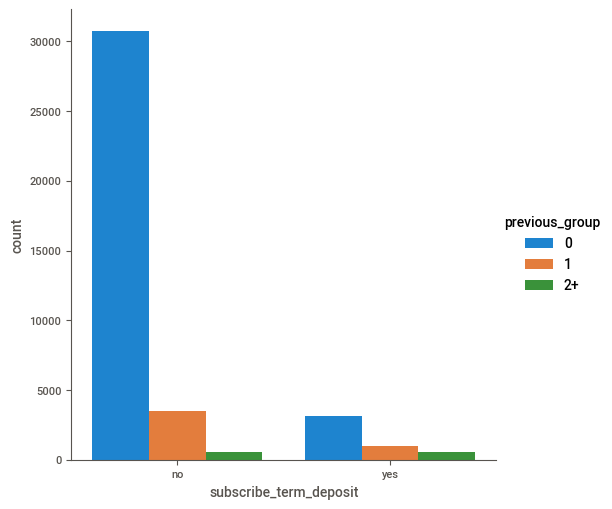

In [323]:
sns.catplot(x='subscribe_term_deposit',hue='previous_group',data=df,kind='count')

In [155]:
def binning (col, cut_points, labels=None):
    minval=col.min()
    maxval=col.max()
    break_points=[minval]+cut_points+[maxval]
    if not labels:
        labels=range(len(cut_points)+1)
    colBin=pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
    return colBin


In [325]:
#group pdays
df.pdays.value_counts()

999    37890
3        438
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

In [156]:
df['pdays_group']=0
df['pdays_group']=binning(df['pdays'],[7,14,100],labels=['less than one week','1-2 weeks','more than 2 weeks','no contanction'])
df['pdays_group'].value_counts()

no contanction        37890
less than one week     1176
1-2 weeks               276
more than 2 weeks        62
Name: pdays_group, dtype: int64

In [174]:
stat, p, dof, expected = chi2_contingency(pd.crosstab(df['pdays_group'],
                                                      df['subscribe_term_deposit']))

In [175]:
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Has a relationship (reject H0)')
else:
    print('Has no relationship(H0 holds true)')

p value is 0.0
Has a relationship (reject H0)


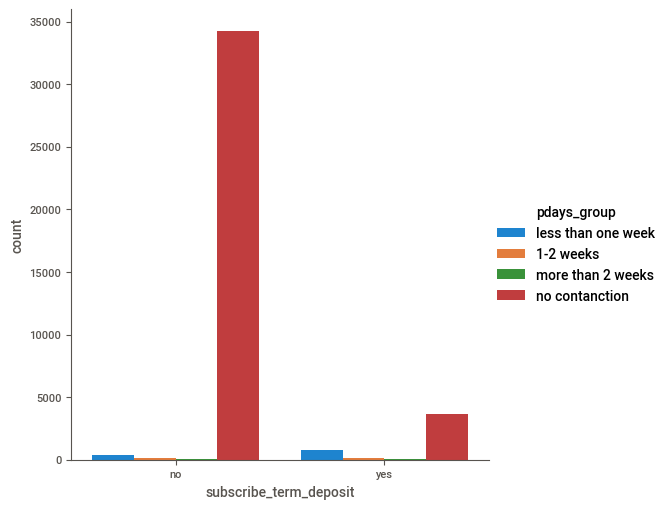

In [327]:
sns.catplot(x='subscribe_term_deposit',hue="pdays_group",data=df,kind="count")

In [240]:
stat, p, dof, expected = chi2_contingency(pd.crosstab(df['pdays_group'],
                                                      df['subscribe_term_deposit']))

In [241]:
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Has a relationship (reject H0)')
else:
    print('Has no relationship(H0 holds true)')

p value is 0.0
Has a relationship (reject H0)


In [242]:
#group age
df.age.value_counts()

31    1825
32    1764
33    1741
35    1671
36    1670
      ... 
89       2
91       2
94       1
87       1
95       1
Name: age, Length: 78, dtype: int64

In [157]:
df['age_group']=0
df['age_group']=binning(df['age'],[35,50],labels=['<35','36-50','>50'])

In [29]:
df['age_group'].value_counts()

36-50    16777
<35      15649
>50       6978
Name: age_group, dtype: int64

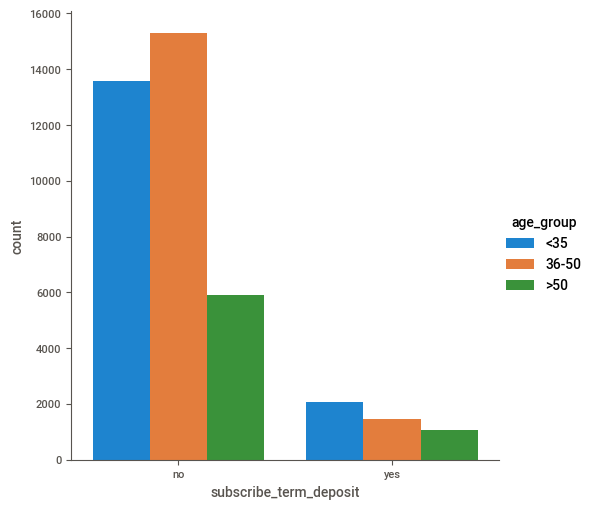

In [330]:
sns.catplot(x='subscribe_term_deposit',hue="age_group",data=df,kind="count")

In [245]:
stat, p, dof, expected = chi2_contingency(pd.crosstab(df['age_group'],
                                                      df['subscribe_term_deposit']))

In [246]:
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Has a relationship (reject H0)')
else:
    print('Has no relationship(H0 holds true)')

p value is 2.9521731817177623e-59
Has a relationship (reject H0)


In [247]:
df['campaign'].value_counts()

1     16368
2     10223
3      5230
4      2625
5      1586
6       974
7       623
8       400
9       283
10      224
11      177
12      125
13       91
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
31        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: campaign, dtype: int64

In [158]:
#group campaign
df['campaign_group']=df['campaign']
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx',
       'euribor3m', 'nr_employed', 'subscribe_term_deposit', 'previous_group',
       'pdays_group', 'age_group', 'campaign_group'],
      dtype='object')

In [159]:
df['campaign_group']=df['campaign_group'].apply(lambda x: '6+' if (x>5) else x)

In [171]:
df["campaign_group"].astype(str)

0        1
1        1
2        1
3        1
4        1
        ..
41183    1
41184    1
41185    2
41186    1
41187    3
Name: campaign_group, Length: 39404, dtype: object

In [172]:
df['campaign_group'].value_counts()

1     16368
2     10223
3      5230
6+     3372
4      2625
5      1586
Name: campaign_group, dtype: int64

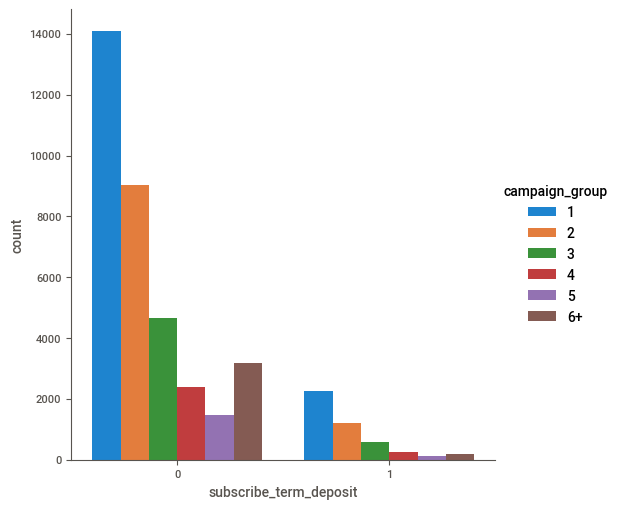

In [251]:
sns.catplot(x='subscribe_term_deposit',hue="campaign_group",data=df,kind="count")

In [252]:
stat, p, dof, expected = chi2_contingency(pd.crosstab(df['campaign_group'],
                                                      df['subscribe_term_deposit']))

In [253]:
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Has a relationship (reject H0)')
else:
    print('Has no relationship(H0 holds true)')

p value is 3.6516707015773805e-50
Has a relationship (reject H0)


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39404 entries, 0 to 41187
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   age                     39404 non-null  int64   
 1   job                     39404 non-null  object  
 2   marital                 39404 non-null  object  
 3   education               39404 non-null  object  
 4   default                 39404 non-null  object  
 5   housing                 39404 non-null  object  
 6   loan                    39404 non-null  object  
 7   contact                 39404 non-null  object  
 8   month                   39404 non-null  object  
 9   day_of_week             39404 non-null  object  
 10  campaign                39404 non-null  int64   
 11  pdays                   39404 non-null  int64   
 12  previous                39404 non-null  int64   
 13  poutcome                39404 non-null  object  
 14  emp_var_rate          

In [33]:
df['subscribe_term_deposit']=df['subscribe_term_deposit'].apply(lambda x : 0 if (x=='no') else 1)

### Make data set balanced

In [34]:
shuffled_df = df.sample(frac=1,random_state=1)
shuffled_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscribe_term_deposit,previous_group,pdays_group,age_group,campaign_group
39523,29,technician,married,university_degree,no,no,no,cellular,apr,mon,...,-1.8,93.749,-34.6,0.645,5008.7,0,1,no contanction,<35,3
34335,31,admin,single,high_school,no,yes,no,cellular,may,thu,...,-1.8,92.893,-46.2,1.266,5099.1,0,0,no contanction,<35,1
8258,40,admin,married,high_school,no,yes,no,telephone,jun,tue,...,1.4,94.465,-41.8,4.864,5228.1,0,0,no contanction,36-50,3
40669,83,retired,divorced,basic_4y,no,yes,no,cellular,sep,thu,...,-1.1,94.199,-37.5,0.879,4963.6,0,0,no contanction,>50,3
34141,33,blue_collar,married,basic_6y,unknown,no,no,cellular,may,wed,...,-1.8,92.893,-46.2,1.281,5099.1,0,0,no contanction,<35,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8053,48,technician,divorced,professional_course,no,no,no,telephone,jun,mon,...,1.4,94.465,-41.8,4.865,5228.1,0,0,no contanction,36-50,5
34185,33,technician,single,high_school,no,yes,no,cellular,may,wed,...,-1.8,92.893,-46.2,1.281,5099.1,0,0,no contanction,<35,3
5354,42,blue_collar,married,basic_6y,unknown,no,yes,telephone,may,fri,...,1.1,93.994,-36.4,4.857,5191.0,0,0,no contanction,36-50,4
12473,28,housemaid,single,basic_6y,no,no,no,cellular,jul,mon,...,1.4,93.918,-42.7,4.960,5228.1,0,0,no contanction,<35,1


In [35]:
yes_df = shuffled_df.loc[shuffled_df['subscribe_term_deposit'] == 1]

In [36]:
number_records_yes = len(yes_df)
number_records_yes

4598

In [37]:
no_df=shuffled_df.loc[shuffled_df['subscribe_term_deposit']== 0].sample(n=number_records_yes,random_state=5)

In [38]:
normalized_df = pd.concat([yes_df, no_df])
normalized_df.shape

(9196, 24)

### Enocding

In [39]:
normalized_df_dummy = pd.get_dummies(normalized_df,columns=['job','marital','education','default','housing',
                                     'loan','contact','month','day_of_week','poutcome',
                                     'pdays_group','campaign_group','previous_group','age_group'],drop_first=True)
normalized_df_dummy.head()

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscribe_term_deposit,...,pdays_group_no contanction,campaign_group_2,campaign_group_3,campaign_group_4,campaign_group_5,campaign_group_6+,previous_group_1,previous_group_2+,age_group_36-50,age_group_>50
37122,61,1,999,0,-2.9,92.201,-31.4,0.884,5076.2,1,...,1,0,0,0,0,0,0,0,0,1
34212,38,2,999,0,-1.8,92.893,-46.2,1.281,5099.1,1,...,1,1,0,0,0,0,0,0,1,0
37954,72,1,3,2,-3.4,92.379,-29.8,0.803,5017.5,1,...,0,0,0,0,0,0,0,1,0,1
24100,32,1,999,0,-0.1,93.200,-42.0,4.343,5195.8,1,...,1,0,0,0,0,0,0,0,0,0
139,45,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,1,0,0,0,0,0,0,0,1,0


In [40]:
df_dummy = pd.get_dummies(df,columns=['job','marital','education','default','housing',
                                     'loan','contact','month','day_of_week','poutcome',
                                     'pdays_group','campaign_group','previous_group','age_group'],drop_first=True)
df_dummy.head()

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscribe_term_deposit,...,pdays_group_no contanction,campaign_group_2,campaign_group_3,campaign_group_4,campaign_group_5,campaign_group_6+,previous_group_1,previous_group_2+,age_group_36-50,age_group_>50
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,0,0,0,0,0,1
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,0,0,0,0,0,1
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,0,0,0,0,0,1


### X y

In [ ]:
#I drop the 'previous','age','pdays','subscribe_term_deposit','campaign' variables 
#after feature engineering.

In [113]:
X = pd.DataFrame(normalized_df_dummy.drop(['previous','age','pdays','subscribe_term_deposit',
                                           'campaign','emp_var_rate', 'cons_price_idx', 'cons_conf_idx',
                                            'euribor3m', 'nr_employed' ],axis=1))
X.head()

,job_blue_collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self_employed,job_services,job_student,job_technician,job_unemployed,...,pdays_group_no contanction,campaign_group_2,campaign_group_3,campaign_group_4,campaign_group_5,campaign_group_6+,previous_group_1,previous_group_2+,age_group_36-50,age_group_>50
37122,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
34212,0,0,0,0,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
37954,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
24100,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
139,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [114]:
y=normalized_df_dummy['subscribe_term_deposit']

In [345]:
len(y)

9196

### Scaling

In [115]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_scaled = sc.fit_transform(X)

In [116]:
X_scaled

array([[-0.48102729, -0.17786408, -0.16016387, ..., -0.26372535,
        -0.78207217,  1.96284754],
       [-0.48102729, -0.17786408, -0.16016387, ..., -0.26372535,
         1.27865438, -0.50946392],
       [-0.48102729, -0.17786408, -0.16016387, ...,  3.79182363,
        -0.78207217,  1.96284754],
       ...,
       [-0.48102729,  5.62227081, -0.16016387, ..., -0.26372535,
        -0.78207217,  1.96284754],
       [-0.48102729, -0.17786408, -0.16016387, ..., -0.26372535,
        -0.78207217, -0.50946392],
       [-0.48102729, -0.17786408, -0.16016387, ..., -0.26372535,
        -0.78207217, -0.50946392]])

In [117]:
y.value_counts()

1    4598
0    4598
Name: subscribe_term_deposit, dtype: int64

In [118]:
from sklearn.utils import shuffle
X2,y = shuffle(X_scaled,y,random_state=0)

In [41]:
normalized_df_dummy.head()

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscribe_term_deposit,...,pdays_group_no contanction,campaign_group_2,campaign_group_3,campaign_group_4,campaign_group_5,campaign_group_6+,previous_group_1,previous_group_2+,age_group_36-50,age_group_>50
37122,61,1,999,0,-2.9,92.201,-31.4,0.884,5076.2,1,...,1,0,0,0,0,0,0,0,0,1
34212,38,2,999,0,-1.8,92.893,-46.2,1.281,5099.1,1,...,1,1,0,0,0,0,0,0,1,0
37954,72,1,3,2,-3.4,92.379,-29.8,0.803,5017.5,1,...,0,0,0,0,0,0,0,1,0,1
24100,32,1,999,0,-0.1,93.200,-42.0,4.343,5195.8,1,...,1,0,0,0,0,0,0,0,0,0
139,45,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,1,0,0,0,0,0,0,0,1,0


In [44]:
df_new=normalized_df_dummy.copy()
df_new

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscribe_term_deposit,...,pdays_group_no contanction,campaign_group_2,campaign_group_3,campaign_group_4,campaign_group_5,campaign_group_6+,previous_group_1,previous_group_2+,age_group_36-50,age_group_>50
37122,61,1,999,0,-2.9,92.201,-31.4,0.884,5076.2,1,...,1,0,0,0,0,0,0,0,0,1
34212,38,2,999,0,-1.8,92.893,-46.2,1.281,5099.1,1,...,1,1,0,0,0,0,0,0,1,0
37954,72,1,3,2,-3.4,92.379,-29.8,0.803,5017.5,1,...,0,0,0,0,0,0,0,1,0,1
24100,32,1,999,0,-0.1,93.200,-42.0,4.343,5195.8,1,...,1,0,0,0,0,0,0,0,0,0
139,45,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32386,21,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,0,...,1,1,0,0,0,0,0,0,0,0
16817,49,2,999,0,1.4,93.918,-42.7,4.962,5228.1,0,...,1,1,0,0,0,0,0,0,1,0
1289,60,1,999,0,1.1,93.994,-36.4,4.855,5191.0,0,...,1,0,0,0,0,0,0,0,0,1
28142,24,1,999,0,-1.8,93.075,-47.1,1.466,5099.1,0,...,1,0,0,0,0,0,0,0,0,0


In [45]:
from sklearn.preprocessing import StandardScaler
scaled= StandardScaler()
y=df_new.subscribe_term_deposit
data_scaled = pd.DataFrame(scaled.fit_transform(df_new),columns = df_new.columns)

In [57]:
data_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9196 entries, 0 to 9195
Data columns (total 65 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            9196 non-null   float64
 1   campaign                       9196 non-null   float64
 2   pdays                          9196 non-null   float64
 3   previous                       9196 non-null   float64
 4   emp_var_rate                   9196 non-null   float64
 5   cons_price_idx                 9196 non-null   float64
 6   cons_conf_idx                  9196 non-null   float64
 7   euribor3m                      9196 non-null   float64
 8   nr_employed                    9196 non-null   float64
 9   subscribe_term_deposit         9196 non-null   int64  
 10  job_blue_collar                9196 non-null   float64
 11  job_entrepreneur               9196 non-null   float64
 12  job_housemaid                  9196 non-null   f

In [48]:
data_scaled.subscribe_term_deposit.value_counts()

 1.0    4598
-1.0    4598
Name: subscribe_term_deposit, dtype: int64

In [51]:
data_scaled['subscribe_term_deposit']=data_scaled['subscribe_term_deposit'].apply(lambda x: 1 if (x==1.0)else 0)

In [52]:
data_scaled['subscribe_term_deposit'].value_counts()

1    4598
0    4598
Name: subscribe_term_deposit, dtype: int64

In [53]:
X_new=data_scaled.copy()

In [58]:
X_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9196 entries, 0 to 9195
Data columns (total 65 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            9196 non-null   float64
 1   campaign                       9196 non-null   float64
 2   pdays                          9196 non-null   float64
 3   previous                       9196 non-null   float64
 4   emp_var_rate                   9196 non-null   float64
 5   cons_price_idx                 9196 non-null   float64
 6   cons_conf_idx                  9196 non-null   float64
 7   euribor3m                      9196 non-null   float64
 8   nr_employed                    9196 non-null   float64
 9   subscribe_term_deposit         9196 non-null   int64  
 10  job_blue_collar                9196 non-null   float64
 11  job_entrepreneur               9196 non-null   float64
 12  job_housemaid                  9196 non-null   f

In [61]:
from sklearn.model_selection import train_test_split

In [63]:
y=X_new.subscribe_term_deposit
y

0       1
1       1
2       1
3       1
4       1
       ..
9191    0
9192    0
9193    0
9194    0
9195    0
Name: subscribe_term_deposit, Length: 9196, dtype: int64

In [64]:
x_train,x_test,y_train,y_test=train_test_split(X_new,y,random_state=0)

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier 
from sklearn.svm import SVC 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import KFold,cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score, roc_curve

In [100]:
def modelfit(model, data, predictors, outcome,test_data):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(test_data[predictors])

  print ("\nModel Report")
  print(model)
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,test_data[outcome])
  #print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #print cross_val_score
  cv_score=cross_val_score(model,data[predictors],data[outcome],cv=20).mean()  
  print("Cross_validation_score : %s" % "{0:.3%}".format(cv_score))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 
  prediction=model.predict(test_data[predictors])
    
  #confusion_matrix
  print(classification_report(test_data[outcome],prediction))
  print(confusion_matrix(test_data[outcome],prediction))
  
    
  #roc curve
  y_pred_prob = model.predict_proba(test_data[predictors])[:,1]

  fpr, tpr, thresholds = roc_curve(test_data[outcome], y_pred_prob)

  plt.plot(fpr,tpr)
  plt.xlabel('fpr')
  plt.ylabel('tpr')
  plt.title("Roc with auc score: %s" % "{0:.3%}".format(accuracy))
  plt.show()

### LogisticRegression

In [69]:
x_train.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'subscribe_term_deposit', 'job_blue_collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self_employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single', 'marital_unknown',
       'education_basic_6y', 'education_basic_9y', 'education_high_school',
       'education_illiterate', 'education_professional_course',
       'education_university_degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent


Model Report
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Cross_validation_score : 74.569%
              precision    recall  f1-score   support

           0       0.69      0.82      0.75      1149
           1       0.78      0.63      0.70      1150

    accuracy                           0.73      2299
   macro avg       0.73      0.73      0.72      2299
weighted avg       0.73      0.73      0.72      2299

[[947 202]
 [429 721]]


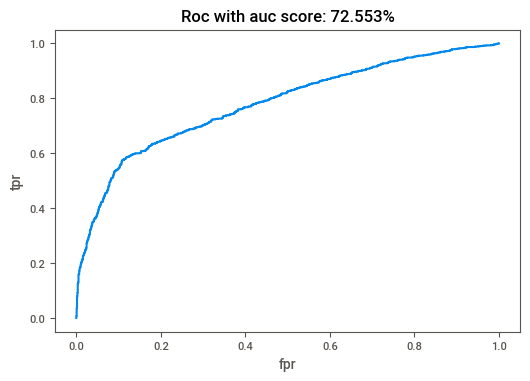

In [184]:
outcome_var = 'subscribe_term_deposit'
model = LogisticRegression()
predictor_var = [ 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
        'job_blue_collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self_employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single', 'marital_unknown',
       'education_basic_6y', 'education_basic_9y', 'education_high_school',
       'education_illiterate', 'education_professional_course',
       'education_university_degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success',
       'pdays_group_1-2 weeks', 'pdays_group_more than 2 weeks',
       'pdays_group_no contanction', 'campaign_group_2', 'campaign_group_3',
       'campaign_group_4', 'campaign_group_5', 'campaign_group_6+',
       'previous_group_1', 'previous_group_2+', 'age_group_36-50',
       'age_group_>50']
modelfit(model, x_train,predictor_var,outcome_var,x_test)

<AxesSubplot:title={'center':'Model Coefficients'}>

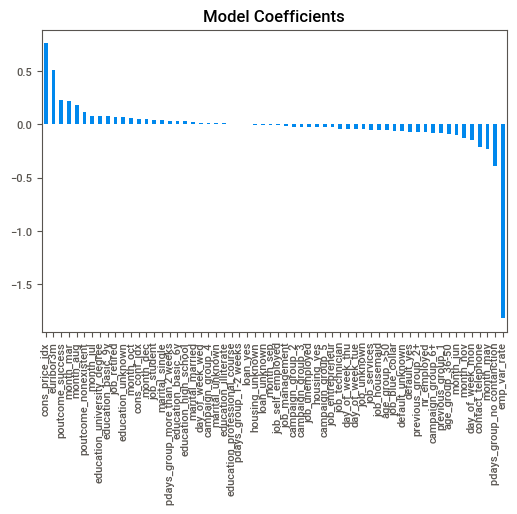

In [185]:
coef=[]
for i in range(0,len(model.coef_)):
    for m in model.coef_[i]:
        coef.append(m)
featimp = pd.Series(coef, index=predictor_var).sort_values(ascending=False)
featimp.plot(kind='bar', title='Model Coefficients')

### Decision Tree


Model Report
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, random_state=None,
                       splitter='best')
Cross_validation_score : 65.767%
              precision    recall  f1-score   support

           0       0.64      0.62      0.63      1149
           1       0.63      0.65      0.64      1150

    accuracy                           0.64      2299
   macro avg       0.64      0.64      0.63      2299
weighted avg       0.64      0.64      0.63      2299

[[714 435]
 [404 746]]


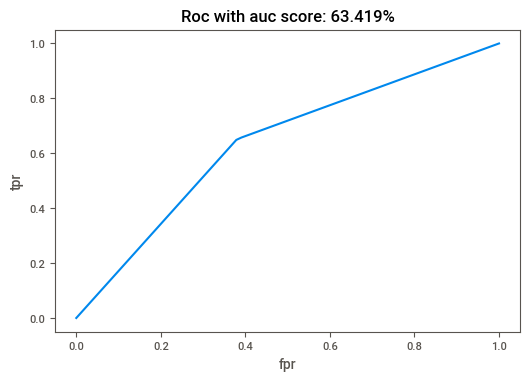

In [186]:
outcome_var = 'subscribe_term_deposit'
model = DecisionTreeClassifier()
predictor_var = ['emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
        'job_blue_collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self_employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single', 'marital_unknown',
       'education_basic_6y', 'education_basic_9y', 'education_high_school',
       'education_illiterate', 'education_professional_course',
       'education_university_degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success',
       'pdays_group_1-2 weeks', 'pdays_group_more than 2 weeks',
       'pdays_group_no contanction', 'campaign_group_2', 'campaign_group_3',
       'campaign_group_4', 'campaign_group_5', 'campaign_group_6+',
       'previous_group_1', 'previous_group_2+', 'age_group_36-50',
       'age_group_>50']
modelfit(model, x_train,predictor_var,outcome_var,x_test)

<AxesSubplot:title={'center':'Feature Importances'}>

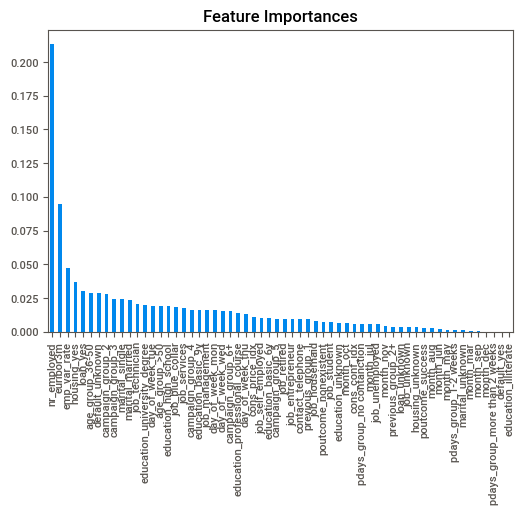

In [187]:
featimp = pd.Series(model.feature_importances_, predictor_var).sort_values(ascending=False)
featimp.plot(kind='bar', title='Feature Importances')

### GradientBoostingClassifier


Model Report
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, random_state=None,
                           subsample=1.0, tol=0.0001, validation_fraction=0.1,
                           verbose=0, warm_start=False)
Cross_validation_score : 75.004%
              precision    recall  f1-score   support

           0       0.69      0.84      0.76      1149
           1       0.79      0.63      0.70      1150

    accuracy                           0.73      2299
   macro avg       0.74      0.73      0.73      2299
weighted avg       0.74      0.73

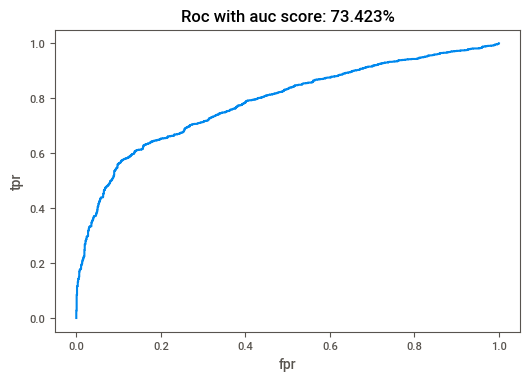

In [192]:
outcome_var = 'subscribe_term_deposit'
model = GradientBoostingClassifier()
predictor_var = ['emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
        'job_blue_collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self_employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single', 'marital_unknown',
       'education_basic_6y', 'education_basic_9y', 'education_high_school',
       'education_illiterate', 'education_professional_course',
       'education_university_degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success',
       'pdays_group_1-2 weeks', 'pdays_group_more than 2 weeks',
       'pdays_group_no contanction', 'campaign_group_2', 'campaign_group_3',
       'campaign_group_4', 'campaign_group_5', 'campaign_group_6+',
       'previous_group_1', 'previous_group_2+', 'age_group_36-50',
       'age_group_>50']
modelfit(model, x_train,predictor_var,outcome_var,x_test)

<AxesSubplot:title={'center':'Feature Importances'}>

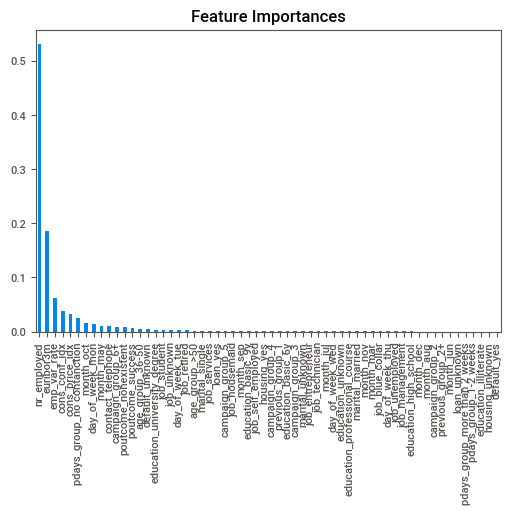

In [193]:
featimp = pd.Series(model.feature_importances_, predictor_var).sort_values(ascending=False)
featimp.plot(kind='bar', title='Feature Importances')

### RandomForestClassifier


Model Report
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Cross_validation_score : 73.322%
              precision    recall  f1-score   support

           0       0.69      0.78      0.73      1149
           1       0.74      0.65      0.69      1150

    accuracy                           0.71      2299
   macro avg       0.72      0.71      0.71      2299
weighted avg       0.72      0.71      0.71      2299

[[892 257]
 [402 748]]


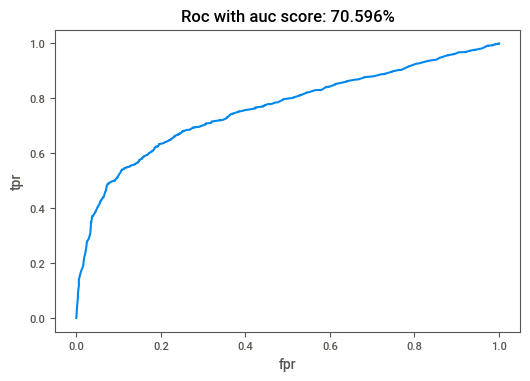

In [190]:
outcome_var = 'subscribe_term_deposit'
model = RandomForestClassifier()
predictor_var = ['emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
        'job_blue_collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self_employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single', 'marital_unknown',
       'education_basic_6y', 'education_basic_9y', 'education_high_school',
       'education_illiterate', 'education_professional_course',
       'education_university_degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success',
       'pdays_group_1-2 weeks', 'pdays_group_more than 2 weeks',
       'pdays_group_no contanction', 'campaign_group_2', 'campaign_group_3',
       'campaign_group_4', 'campaign_group_5', 'campaign_group_6+',
       'previous_group_1', 'previous_group_2+', 'age_group_36-50',
       'age_group_>50']
modelfit(model, x_train,predictor_var,outcome_var,x_test)

<AxesSubplot:title={'center':'Feature Importances'}>

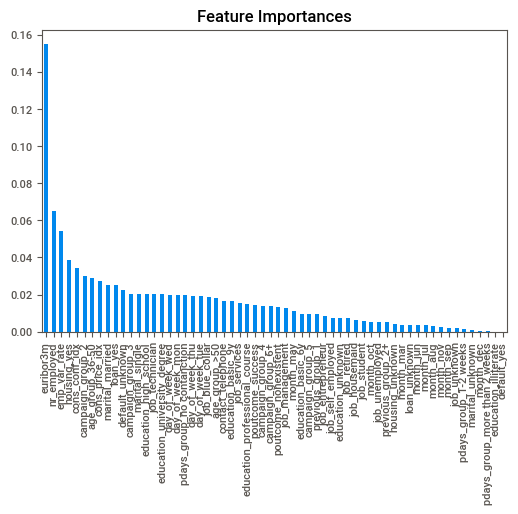

In [191]:
featimp = pd.Series(model.feature_importances_, predictor_var).sort_values(ascending=False)
featimp.plot(kind='bar', title='Feature Importances')

### SVM


Model Report
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
Cross_validation_score : 74.337%
              precision    recall  f1-score   support

           0       0.68      0.83      0.75      1149
           1       0.78      0.62      0.69      1150

    accuracy                           0.72      2299
   macro avg       0.73      0.72      0.72      2299
weighted avg       0.73      0.72      0.72      2299

[[948 201]
 [439 711]]


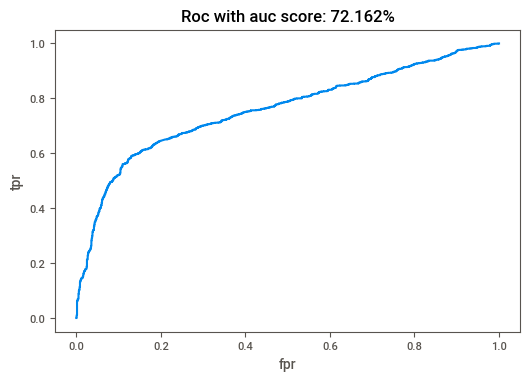

In [194]:
outcome_var = 'subscribe_term_deposit'
model = SVC(probability=True)
predictor_var = ['emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
        'job_blue_collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self_employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single', 'marital_unknown',
       'education_basic_6y', 'education_basic_9y', 'education_high_school',
       'education_illiterate', 'education_professional_course',
       'education_university_degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success',
       'pdays_group_1-2 weeks', 'pdays_group_more than 2 weeks',
       'pdays_group_no contanction', 'campaign_group_2', 'campaign_group_3',
       'campaign_group_4', 'campaign_group_5', 'campaign_group_6+',
       'previous_group_1', 'previous_group_2+', 'age_group_36-50',
       'age_group_>50']
modelfit(model, x_train,predictor_var,outcome_var,x_test)

### AdaBoost


Model Report
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)
Cross_validation_score : 74.511%
              precision    recall  f1-score   support

           0       0.69      0.84      0.75      1149
           1       0.79      0.62      0.70      1150

    accuracy                           0.73      2299
   macro avg       0.74      0.73      0.72      2299
weighted avg       0.74      0.73      0.72      2299

[[960 189]
 [436 714]]


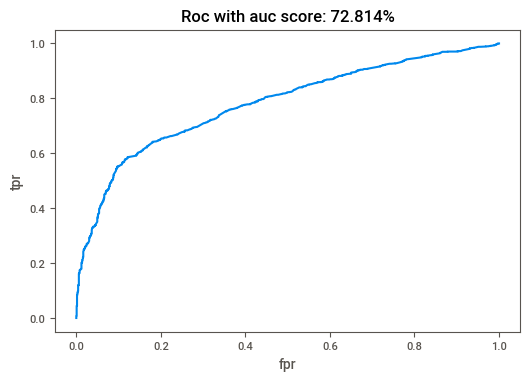

In [197]:
outcome_var = 'subscribe_term_deposit'
model = AdaBoostClassifier()
predictor_var = [ 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
        'job_blue_collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self_employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single', 'marital_unknown',
       'education_basic_6y', 'education_basic_9y', 'education_high_school',
       'education_illiterate', 'education_professional_course',
       'education_university_degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success',
       'pdays_group_1-2 weeks', 'pdays_group_more than 2 weeks',
       'pdays_group_no contanction', 'campaign_group_2', 'campaign_group_3',
       'campaign_group_4', 'campaign_group_5', 'campaign_group_6+',
       'previous_group_1', 'previous_group_2+', 'age_group_36-50',
       'age_group_>50']
modelfit(model, x_train,predictor_var,outcome_var,x_test)

<AxesSubplot:title={'center':'Feature Importances'}>

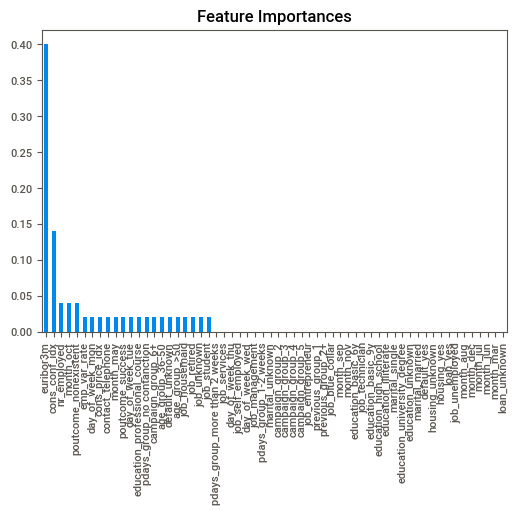

In [204]:
featimp = pd.Series(model.feature_importances_, predictor_var).sort_values(ascending=False)
featimp.plot(kind='bar', title='Feature Importances')